## RQ 2

####  Let's explore the dataset by finding simple insights regarding the profile and posts

#### 2.1 Plot the number of posts for each profile in descending order.

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [ ]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


##### Order from highest to lowest with respect to number of posts

In [ ]:
profiles_df.sort_values(by='n_posts', ascending=False, inplace=True)

##### Drop NaN values in n_posts column

In [ ]:
profiles_df = profiles_df[profiles_df["n_posts"].notna()]

##### Drop n_posts that are equal to 0

In [ ]:
profiles_df_without_0 = profiles_df.loc[profiles_df["n_posts"] != 0]

In [ ]:
profiles_df_without_0_filtered = profiles_df_without_0[['profile_name','n_posts']]

##### The DataFrame was transformed to Numpy to be able to plot it.

In [ ]:
profiles_df_without_0_filtered_array = profiles_df_without_0_filtered.to_numpy()

##### Because the DataFrame to be plotted is quite large, LensPy DynamicPlot was used. "LensPy extends Plotly's Dash to allow you to plot very large datasets (millions of points) while ensuring that figures are still fast, fluid, and responsive" https://pypi.org/project/lenspy/

##### LensPy can build dynamic figures of very large datasets without overwhelming the browser when viewing the figures.

##### When the code is run, you can see that it is on the server:

##### " Dash is running on http://127.0.0.1:8050/ "

##### And there we can see that the user with the highest number of posts is jasem3312 with 188.73k posts.
##### You can move the pointer and see each of the profiles with their amount of posts.

<img src= 'Dash_ADM2.png'>

In [ ]:
pip install lenspy

In [ ]:
import numpy as np
import plotly.graph_objects as go
from lenspy import DynamicPlot

x = profiles_df_without_0_filtered_array[:,0]

y = profiles_df_without_0_filtered_array[:,1]

fig = go.Figure(data=[go.Scattergl(x=x, y=y)])

plot = DynamicPlot(fig)
plot.show()




/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1950

#### 2.2 What posts have the highest number of "likes"?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and numbr_likes

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','numbr_likes']]
    
    df_list.append(filtered)

86it [03:59,  2.78s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_likes"

In [ ]:
from functools import reduce

post_likes = reduce(lambda df1, df2: df1.append(df2), df_list)

post_likes.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3432768451.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0


##### .nlargest() was used to select the 10 most popular posts based on the number of likes

##### As a result, it is obtained that the post with the highest number of likes is the post_id "Bt3yaXmAM0d" with 8.8M likes.

In [ ]:
top10_post_id = post_likes \
    .nlargest(10, 'numbr_likes')
    
top10_post_id

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


#### 2.3 What posts have the most and the least number of comments?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and number_comments

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','number_comments']]
    
    df_list.append(filtered)

86it [03:28,  2.43s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_comments"

In [ ]:
from functools import reduce

post_comments = reduce(lambda df1, df2: df1.append(df2), df_list)

post_comments.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3953308785.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,number_comments
0,BXdjjUlgcgq,0.0
1,BVg0pbolYBC,1.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0


##### .nlargest() was used to select the 10 most popular posts based on the number of comments

##### As a result, it is obtained that the post with the highest number of comments is the post_id "Bx2sPAjHviO" with 488k likes.

In [ ]:
top10_comments = post_comments \
    .nlargest(10, 'number_comments')
    
top10_comments

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0
5427268,BoQoM-JFkPA,180635.0
25257169,Bwarws1lCok,173988.0
6220011,Bt4qlVDAZMH,170836.0
31689573,Bs9NhQkAcJA,166919.0
14257307,Bzqb95QI_1E,166198.0


##### .nsmallest() was used to select the 10 least popular posts based on the number of comments

##### As a result, it is observed that there are many posts with 0 comments.

In [ ]:
least10_comments = post_comments \
    .nsmallest(10, 'number_comments')

least10_comments

,post_id,number_comments
0,BXdjjUlgcgq,0.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0
11,Bx-ptmpinBs,0.0
12,Bx9uKZAAHDg,0.0
13,Bx5qGE0AlMM,0.0
23,Bxf-Vl4lK2S,0.0
24,BxCrxafBm-9,0.0
28,BwRE4lYhQ3r,0.0


#### 2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and location_id

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','location_id']]
    
    df_list.append(filtered)

86it [03:17,  2.30s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_location_id"

In [ ]:
from functools import reduce

post_location_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_location_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/2672636998.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14


##### np.any was used to create the null_location_id column and assign 1 to posts that did not have a location ID and 0 to posts that did.

In [ ]:
post_location_id['null_location_id'] = np.any(post_location_id[post_location_id.columns[1:]].isnull(), axis=1).astype(int)

In [ ]:
post_location_id_tag =post_location_id \
    .groupby(['null_location_id'])  \
    .agg(count=('null_location_id', 'count'))


In [ ]:
post_location_id_tag

,count
null_location_id,
0,29737425
1,12972772


##### plot.pie was used to visualize the result.

##### As can be seen in the graph, 30.4% of the posts do not have a location ID, while 69.6% do have a location ID. Therefore, it is concluded that most Instagram users use the location tag so that their followers can see where they are.

<AxesSubplot:title={'center':'Tag Locations'}, ylabel='count'>

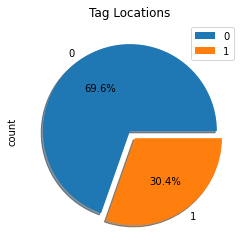

In [ ]:
post_location_id_tag.plot.pie(y='count', title='Tag Locations', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

#### 2.5 How many posts include only photos? How many also have videos?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and post_type

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','post_type']]
    
    df_list.append(filtered)

86it [02:57,  2.07s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_type_id"

In [ ]:
from functools import reduce

post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_type_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1110/3773087190.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)


,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1


##### It was grouped by type of post and a count was made to know how many were Post type 1 (pictures) and how many were Post type 3 (pictures and videos).

In [ ]:
post_type_id_count =post_type_id \
    .groupby(['post_type'])  \
    .agg(count=('post_type', 'count'))

In [ ]:
post_type_id_count

,count
post_type,
1,41534486
2,1134768
3,40943


##### .plot.pie was used to visualize that 97.2% of posts only have pictures and 0.1% of posts have both, pictures and videos.

<AxesSubplot:title={'center':'Post type'}, ylabel='count'>

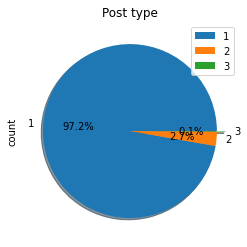

In [ ]:
post_type_id_count.plot.pie(y='count', title='Post type', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0, 0.1), startangle=0)

#### 2.6 What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

##### The columns of interest were saved in a DataFrame

In [ ]:
business_account = profiles_df[['profile_id','is_business_account']]

##### A group by was made for the column and its values and a count

In [ ]:
business_account_count =business_account  \
    .groupby(['is_business_account'])  \
    .agg(count=('is_business_account', 'count'))

##### .plot.pie was used to visualize that 24.8% of the accounts are business accounts. Therefore, it can be said that a very high percentage is used by companies to carry out marketing and advertising campaigns.

<AxesSubplot:title={'center':'Is Business Account?'}, ylabel='count'>

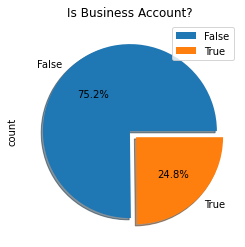

In [ ]:
business_account_count.plot.pie(y='count', title='Is Business Account?', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0.1), startangle=0)

# RQ3

**1. What is the most common time in which users publish their posts?**


**2. Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.**


**3. Use the function that you created in the previous literal to plot the number of posts between the following time intervals:**


||Initial Time|Final Time|
|---|---|---|
| 1 | 06:00:00 | 10:59:59 |
| 2 | 11:00:00 |  13:59:59|
| 3 | 14:00:00 |  16:59:59|
| 4 | 17:00:00 |  19:59:59|
| 5 | 20:00:00 | 23:59:59|
| 6 | 00:00:00 | 02:59:59|
| 7 | 03:00:00 | 05:59:59|
|...|||

In [ ]:

import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

# 3.1 

In [ ]:
posts =  pd.read_csv("instagram_posts.zip",delimiter="\t",usecols=["post_id", "cts"])#Increase up to len of dataframe

**Body of 3.1**

In [ ]:
posts.isna().sum()
posts.dropna()

,post_id,cts
0,BXdjjUlgcgq,2017-08-06 20:06:57.000
1,BVg0pbolYBC,2017-06-19 09:31:16.000
2,BRgkjcXFp3Q,2017-03-11 20:05:03.000
3,BKTKeNhjEA7,2016-09-13 16:27:16.000
4,8-NQrvoYLX,2015-10-18 10:19:27.000
...,...,...
42710192,BcpWMWGBfxh,2017-12-13 15:38:04.000
42710193,Ba6LZWwlCl8,2017-10-31 11:28:01.000
42710194,BPN0kM1hYUw,2017-01-13 20:16:37.000
42710195,BxsZ8nDBr-L,2019-05-20 20:07:52.000


**Convert to datetime and keeping only the hour:minute:second**

In [ ]:
posts['cts'] = pd.to_datetime(posts.cts).dt.time

**STEP 1: Selecting only cts and post_id columns**


**STEP 2: Counting each row grouped by cts**

In [ ]:
counter = posts.groupby('cts').post_id.count()

In [ ]:
counter

cts
00:00:00    470
00:00:01    570
00:00:02    538
00:00:03    555
00:00:04    565
           ... 
23:59:55    496
23:59:56    487
23:59:57    488
23:59:58    469
23:59:59    491
Name: post_id, Length: 86400, dtype: int64

**Calculating Maximum count of post**

In [ ]:
maximum  = max(counter)
print(maximum)
result =  counter[counter == maximum]


928


**Returning the cts value corresponding to the maximum**

In [ ]:
output  = str(result).replace("\n"," ")

output  = output[4:12]
print("The most common time in which users publish their posts is: ")
output

The most common time in which users publish their posts is: 


'21:00:09'

# 3.2

**time_interval(time_list,posts) takes as input a list of time intervals = time_list which its elements is a list of two datetime.time object. This two datetime.time objects delimit the interval.
The second input is the posts_dataframe.
Please use posts_cts_manager to cast every entries in posts_dataframe['cts'] column in the right object type(datatime.time)**

In [ ]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if( type(time[0])== type(date) and time[0]<= date and time[1]>=date):
                counter[interval] += 1
    plt.figure(figsize=(10,10))
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g',width=.3)
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

# 3.3


**The code counts the number of posts published in each time interval given as input and plots the frequencies
in a histogram**

**The code calls time_interval function written above**


Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


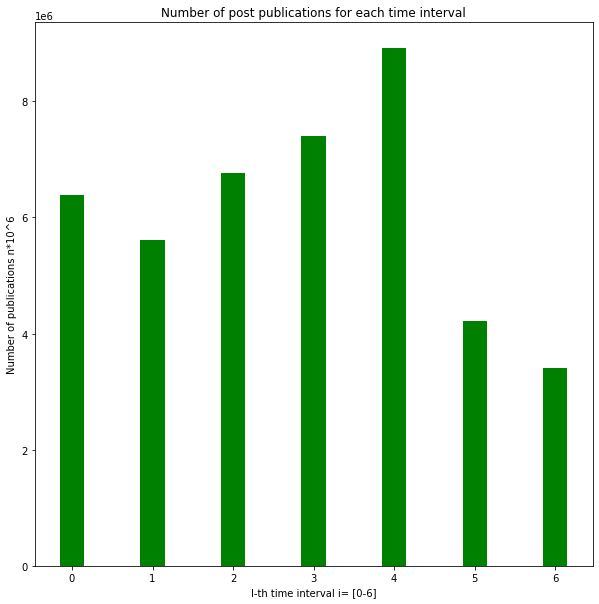

In [ ]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.title("Number of post publications for each time interval")
plt.ylabel("Number of publications n*10^6")
plt.xlabel("I-th time interval i= [0-6]")
plt.show()

**Users have the tendency to post more in the time interval between 20-00 than in every other time interval we gave as input to the make the plot. Also the most common time in which users publish a post falls inside the time interval with the most publications.**

**In fact there are more that 8 million publications in the time between 20-00.**

# FREE MEMORY

In [1]:
del posts

NameError: name 'posts' is not defined

# RQ4

**In most cases, we will not have a __consistent dataset__, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.**

   **1. Write a function that, given a profile_id, will be able to return the posts that belong to the given *profile_id*.**
   
   **2. Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the *profile.csv* using the previously written function.**
     
   **3. What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in *profile.csv*?**
    
   **4. Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.**


In [ ]:
import pandas as pd
import numpy as np
import random
import logging
import datatable as dt
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

# 4.1

**Function which returns all the post published by the account with id = profile_id that are present in the posts_dataframe**

In [ ]:
def find_posts_byId(profile_id,posts_dataframe):
    return posts_dataframe[posts_dataframe.profile_id == profile_id]

**TEST**

In [ ]:
#For the entire dataframe:
    # posts_datatable = dt.fread("~/Downloads/instagram_posts.zip",sep='\t')
posts_dataframe =  pd.read_csv("instagram_posts.zip",delimiter="\t",usecols=['post_id','profile_id','cts','numbr_likes','number_comments'])

In [ ]:
profile_dataframe = pd.read_csv("instagram_profiles.zip",delimiter="\t")

**Random profile_id from dataset**

In [ ]:
print(posts_dataframe.shape[0])

42710197


In [ ]:
id1 = posts_dataframe.profile_id[random.randint(0,posts_dataframe.shape[0])]
id1
id2 = 623386236.0

**Function that execute find_posts_byId and checks for errors in the output**

In [ ]:
def check_test(profile_id,posts_dataframe):
    correct  = posts_dataframe[posts_dataframe.profile_id == np.float64(profile_id)].shape[0]
    test = find_posts_byId(profile_id,posts_dataframe)
    if(test.shape[0] == correct) :
        print("Function find_posts_byId is working")
    else:
        print("Function find_posts_byId is incorrect")

In [ ]:
check_test(id1,posts_dataframe)
check_test(id2,posts_dataframe)

Function find_posts_byId is working
Function find_posts_byId is working


# 4.2

In [ ]:
def posts_top_profiles(n,posts_dataframe,profile_dataframe):
    top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(n+1)    
    output_posts = []
    for id in top_posted_profiles:
        output_posts.append(find_posts_byId(id,posts_dataframe))
    result = pd.concat(output_posts)
    return result
    

**TEST**

In [ ]:
top_posted_profiles = profile_dataframe.sort_values('n_posts',ascending=False).profile_id.head(11)    
print(top_posted_profiles)
display(posts_top_profiles(10,posts_dataframe,profile_dataframe))

3990313    1.996648e+08
2571453    8.563367e+09
4338921    1.273455e+09
3942129    9.813508e+06
4219642    1.607309e+09
2207897    1.087614e+09
4313908    1.603890e+09
4219476    2.181730e+08
4236057    2.855497e+08
1631526    8.312603e+09
4219551    1.701679e+09
Name: profile_id, dtype: float64


,post_id,profile_id,cts,numbr_likes,number_comments
9592952,Bq3hP3Khp8J,1.996648e+08,2018-12-02 03:03:33.000,0.0,0.0
9592953,Bq3hN53hUsD,1.996648e+08,2018-12-02 03:03:17.000,0.0,0.0
9592954,BCqCe9LypeF,1.996648e+08,2016-03-07 16:28:50.000,27.0,0.0
9592955,20Wu4zypd2,1.996648e+08,2015-05-18 11:21:27.000,28.0,0.0
9592956,BrKq76AhadU,1.996648e+08,2018-12-09 13:33:47.000,1.0,0.0
...,...,...,...,...,...
40437904,BxT74jSH25K,1.701679e+09,2019-05-11 08:03:24.000,0.0,0.0
40996459,BxzVSO6hq2V,1.701679e+09,2019-05-23 06:41:49.000,1.0,0.0
41291564,BxrFpFzBquO,1.701679e+09,2019-05-20 07:51:12.000,1.0,0.0
42357392,BxwWhDXh9-v,1.701679e+09,2019-05-22 08:54:51.000,1.0,0.0


# 4.3

**Collect all the posts published by the top 10 profiles who posted more**

In [ ]:
averages = posts_top_profiles(10,posts_dataframe,profile_dataframe)

**Compute the average number of likes and comments for each profile  who is in the top 10 profiles with the most number of posts**

In [ ]:
averages.groupby("profile_id")[['numbr_likes','number_comments']].mean()  

,numbr_likes,number_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
1.701679e+09,1.447368,0.000000


# 4.4

**Functions written in the RQ3 file**

In [ ]:
def posts_cts_manager(post_dataframe):
    posts_dataframe['cts'] = pd.to_datetime(posts_dataframe.cts).dt.time

def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0
        for date in posts['cts']:
            if(type(time[0])== type(date) and time[0]<= date and time[1]>=date):
                counter[interval] += 1
    plt.figure(figsize=(10,10))
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the quantity of post publications for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1
    return hist

**Pass the time intervals as input of  time_interval() function**

In [ ]:
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)

**Execute time_interval function with the input built in the cell above on the posts of the top10 profiles with the most number of posts**

In [ ]:
target_posts = posts_top_profiles(10,posts_dataframe,profile_dataframe)   
display(target_posts)

,post_id,profile_id,cts,numbr_likes,number_comments
9592952,Bq3hP3Khp8J,1.996648e+08,03:03:33,0.0,0.0
9592953,Bq3hN53hUsD,1.996648e+08,03:03:17,0.0,0.0
9592954,BCqCe9LypeF,1.996648e+08,16:28:50,27.0,0.0
9592955,20Wu4zypd2,1.996648e+08,11:21:27,28.0,0.0
9592956,BrKq76AhadU,1.996648e+08,13:33:47,1.0,0.0
...,...,...,...,...,...
40437904,BxT74jSH25K,1.701679e+09,08:03:24,0.0,0.0
40996459,BxzVSO6hq2V,1.701679e+09,06:41:49,1.0,0.0
41291564,BxrFpFzBquO,1.701679e+09,07:51:12,1.0,0.0
42357392,BxwWhDXh9-v,1.701679e+09,08:54:51,1.0,0.0


In [ ]:
#execute this cell ONLY ONCE if target_posts have just been loaded in the file
#posts_cts_manager(target_posts)

Histogram with the quantity of post publications for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


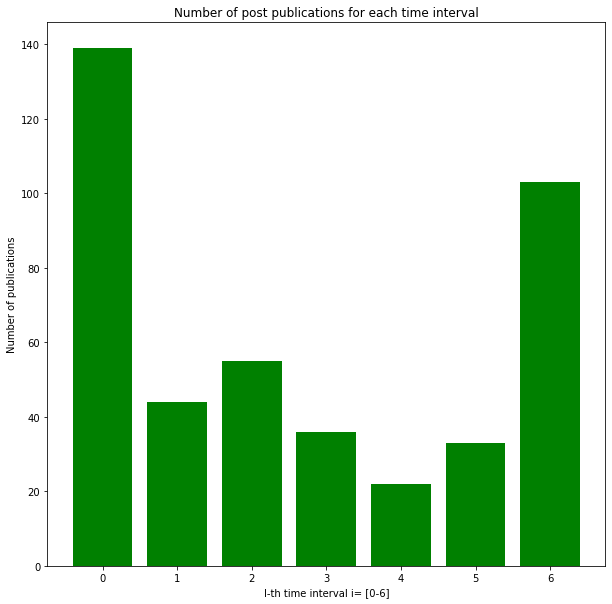

In [ ]:
time_interval(time_list,target_posts)
plt.title("Number of post publications for each time interval")
plt.ylabel("Number of publications")
plt.xlabel("I-th time interval i= [0-6]")
plt.show()

# CONCLUSION
The plot shows us that the top10 profiles prefer to post in the time that goes from 6 am to 11 am.
This result can't give a general conclusion on the preferred time in which users publish their posts. Beacuse this result is not the same as the one considering all the other profiles, since the result obtained may be influenced by the publication times of a single profile.

# FREE MEMORY

In [ ]:
del posts_dataframe
del profile_dataframe
del target_posts

NameError: name 'posts_dataframe' is not defined

## RQ 5

#### The most influential users are the ones with the highest number of “followers", you can now look more into their activity

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [ ]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


#### 5.1 Plot the top 10 most popular users in terms of followers and their number of posts.

##### The dataframe was organized to only obtain the necessary columns. .nlargest() was used to select the 10 most popular usersbased on followers

In [ ]:
top10 = profiles_df[['profile_id', 'profile_name', 'followers', 'n_posts']] \
    .nlargest(10, 'followers')
    
top10

,profile_id,profile_name,followers,n_posts
2880218,2.502532e+07,instagram,285457645.0,5760.0
2582507,3.416684e+06,victoriassecret,65269440.0,7355.0
3820939,2.082449e+07,nba,35339708.0,28816.0
701965,1.876191e+08,louisvuitton,30689316.0,3352.0
2414951,2.125507e+09,buzzfeedtasty,30246783.0,2791.0
2785241,4.968651e+08,andresiniesta8,29542143.0,990.0
333193,2.341008e+07,hm,29176804.0,4566.0
3934581,2.423993e+07,princessyahrini,29042823.0,4719.0
1311970,5.041706e+07,danbilzerian,26476004.0,1311.0
1703764,9.070254e+08,akshaykumar,26252169.0,1173.0


##### pd.plot() and the subplot attribute were used to get the top 10 most popular users in terms of number of posts and followers. Subplot was used because the scale of y values ​​differed by a large number and therefore it was not possible to correctly represent both attributes in the same plot.

##### More props at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

array([<AxesSubplot:title={'center':'n_posts'}, xlabel='profile_name'>,
       <AxesSubplot:title={'center':'followers'}, xlabel='profile_name'>],
      dtype=object)

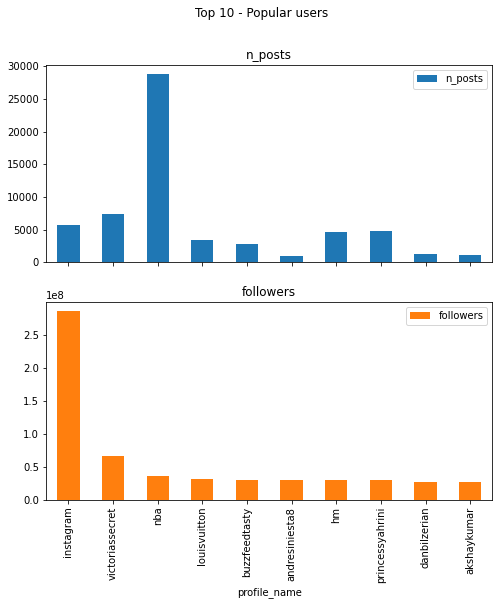

In [ ]:
top10.plot(x='profile_name', y=['n_posts', 'followers'], kind='bar', subplots=True, 
           title='Top 10 - Popular users', figsize=(8, 8)) # , layout=(1, 2), sharey=True)

#### 5.2 Who is the most influential user?

##### Assuming that the most influential user is the one with the largest number of followers, the "Instagram" user is the most influential as it has 285M followers with 5.7K posts.

In [ ]:
top10.head(1)

,profile_id,profile_name,followers,n_posts
2880218,25025320.0,instagram,285457645.0,5760.0


#### 5.3 Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

##### .astype('int32') was used to convert the "profile_id" column format to integers.

In [ ]:

selected_profile_ids = top10.profile_id.astype('int32').to_list()

##### Through the for loop and the established chunksize, we search for all the posts that are related to the 10 most influential profiles.

In [ ]:
from tqdm import tqdm

posts_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[chunk.profile_id.isin(selected_profile_ids)]
    
    posts_list.append(filtered)


86it [04:03,  2.83s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "posts_df"

In [ ]:
from functools import reduce

posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)

posts_df.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  posts_df = reduce(lambda df1, df2: df1.append(df2), posts_list)
/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1098/1048374259.py:3: FutureWarning: The frame.append method is deprecated and will be removed from p

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
266570,28641534,336492,Ss3ULFBQeM,25025320.0,5.332856e+06,2012-12-01 17:42:03.000,1,"On December 1st, 1955, in Montgomery, Alabama ...",125428.0,1240.0
659635,29042650,336492,BeECzRuh1O6,25025320.0,5.873874e+08,2018-01-17 20:59:30.000,1,Photo by @jameswhitlowdelano\nAfter traveling ...,669786.0,4818.0
1441841,29834978,336492,Brl3hGMAxiy,25025320.0,8.770667e+14,2018-12-20 03:03:13.000,1,Photo by @overrated_outcast\nOne word you can’...,1914299.0,20065.0
1559527,29952957,337097,BFrYARaRh55,20824486.0,6.294880e+05,2016-05-21 19:30:19.000,1,Who else is hoopin' today?,164521.0,1415.0
2410579,30815147,336492,BZNHb3ijnDT,25025320.0,3.500213e+08,2017-09-19 03:56:12.000,1,Photo by @keepingwiththetimes\nA cheerful burs...,840588.0,3627.0


##### A backup CSV file is saved

In [ ]:
posts_df.to_parquet('posts_df.parquet.snappy')
posts_df.to_csv('posts_df.csv')

posts_top10_df = posts_df

##### A "groupby" by Profile ID and Location ID is made to find out how many different Location IDs were used per profile. Therefore, the answer to the question is: 91 different tag locations were used by the 10 most popular profiles.

In [ ]:
locations_posts_count = posts_top10_df \
    .groupby(['profile_id', 'location_id'], dropna=True) \
    .agg(count=('post_id', 'count'))
    
locations_posts_count.reset_index(inplace=True)

locations_posts_count = locations_posts_count \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64', 'count' : 'int32'})

locations_posts_count

,profile_id,location_id,count
0,3416684,262606339,1
1,3416684,116531305845344,1
2,3416684,189331311669042,1
3,3416684,252960988517436,1
4,3416684,302612476852048,1
...,...,...,...
87,496865116,179370,1
88,496865116,366902078,3
89,496865116,2019565374753966,1
90,907025384,1653066228336077,1


##### The base "posts_top10_df_location" is prepared to later perform a merge and find the most visited areas and cities according to the ID Location.

In [ ]:
locations_df = pd.read_csv('instagram_locations.csv', delimiter='\t')

posts_top10_df_location = posts_top10_df[['post_id','profile_id','location_id']]
posts_top10_df_location = posts_top10_df_location.dropna()

posts_top10_df_location = posts_top10_df_location \
    .astype({'profile_id' : 'int64', 'location_id' : 'int64'})

posts_top10_df_location    

,post_id,profile_id,location_id
266570,Ss3ULFBQeM,25025320,5332856
659635,BeECzRuh1O6,25025320,587387369
1441841,Brl3hGMAxiy,25025320,877066659067597
1559527,BFrYARaRh55,20824486,629488
2410579,BZNHb3ijnDT,25025320,350021298
...,...,...,...
41532427,BswHrnTB2HN,25025320,838523900
41608204,Bi7wE8uBWNI,25025320,1011688667
41874115,rdbaZkRhzl,20824486,244021299
42211393,Bf4WZMdljVZ,20824486,433604130


##### pd.merge() was used to merge the CSV Instagram Locations using the Location ID.

In [ ]:
location_post_area = pd.merge(left=posts_top10_df_location, right=locations_df, left_on='location_id', right_on='id')
location_post_area

,post_id,profile_id,location_id,sid,id,name,street,zip,city,region,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,Ss3ULFBQeM,25025320,5332856,762145,5332856,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
1,BeECzRuh1O6,25025320,587387369,775485,587387369,Ethiopian Highlands,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
2,Brl3hGMAxiy,25025320,877066659067597,804342,877066659067597,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
3,BFrYARaRh55,20824486,629488,808150,629488,David Crombie Park,131 The Esplanade,M5A 4P5,"Toronto, Ontario",NaN,...,Saint Lawrence,saint-lawrence,CA,Canada,-79.368635,43.648486,NaN,david-crombie-park,http://www1.toronto.ca/parks/prd/facilities/co...,2019-06-01 19:46:51.479
4,BZNHb3ijnDT,25025320,350021298,838341,350021298,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,BswHrnTB2HN,25025320,838523900,709981,838523900,Stanislaus National Forest,NaN,NaN,"Lodi, California",NaN,...,NaN,NaN,NaN,NaN,-121.291619,38.139407,NaN,stanislaus-national-forest,http://www.fs.usda.gov/main/stanislaus/home,2019-05-28 14:07:28.559
101,Bi7wE8uBWNI,25025320,1011688667,712659,1011688667,Leuser Ecosystem,Leuser,NaN,"Blangpidi, Aceh, Indonesia",NaN,...,NaN,NaN,NaN,NaN,96.847161,3.743398,NaN,leuser-ecosystem,http://leuserecosystem.org,2019-05-28 17:05:17.449
102,rdbaZkRhzl,20824486,244021299,722170,244021299,InfoCision Stadium–Summa Field,427 Nash St,44304,"Akron, Ohio",NaN,...,NaN,NaN,NaN,NaN,-81.508443,41.072518,NaN,infocision-stadiumsumma-field,http://www.gozips.com/athletics/facilities/Inf...,2019-05-29 03:39:14.795
103,Bf4WZMdljVZ,20824486,433604130,734424,433604130,The Toyta Center,1510 Polk St,77010,"Houston, Texas",NaN,...,Downtown Houston,downtown-houston,US,United States,-95.362071,29.750773,NaN,the-toyta-center,www.houstontoyotacenter.com,2019-05-29 16:21:10.297


##### The most frequent areas are obtained by a "groupby" using the Location Name and a counter used in the post_id. The most visited areas by the 10 most popular influencers are Sydney, Australia and Victoria's Secret.

In [ ]:
locations_frequent_area = location_post_area \
    .groupby(['name']) \
    .agg(count=('post_id', 'count'))
    
locations_frequent_area.reset_index(inplace=True)

locations_frequent_area.nlargest(10, 'count')

,name,count
70,"Sydney, Australia",9
80,Victoria's Secret,4
37,"Kobe-shi, Hyogo, Japan",3
9,Bel-Air Estate,2
11,"Bora Bora, French Polynesia",2
81,Wells Fargo Center,2
0,666 Fifth Avenue,1
1,ARIA Poker Room,1
2,AZULIK Tulum,1
3,Amsterdam Forest,1


##### To obtain the plot of visits by city, a "groupby" is first made by city and a post_id counter. Then, the cities are sorted in descending order using a pd.sort_values ​​with respect to the number of visits. Finally, pd.plot() was used to obtain the plot shown below.

<AxesSubplot:title={'center':'Cities visited'}, xlabel='City', ylabel='Number of times visited'>

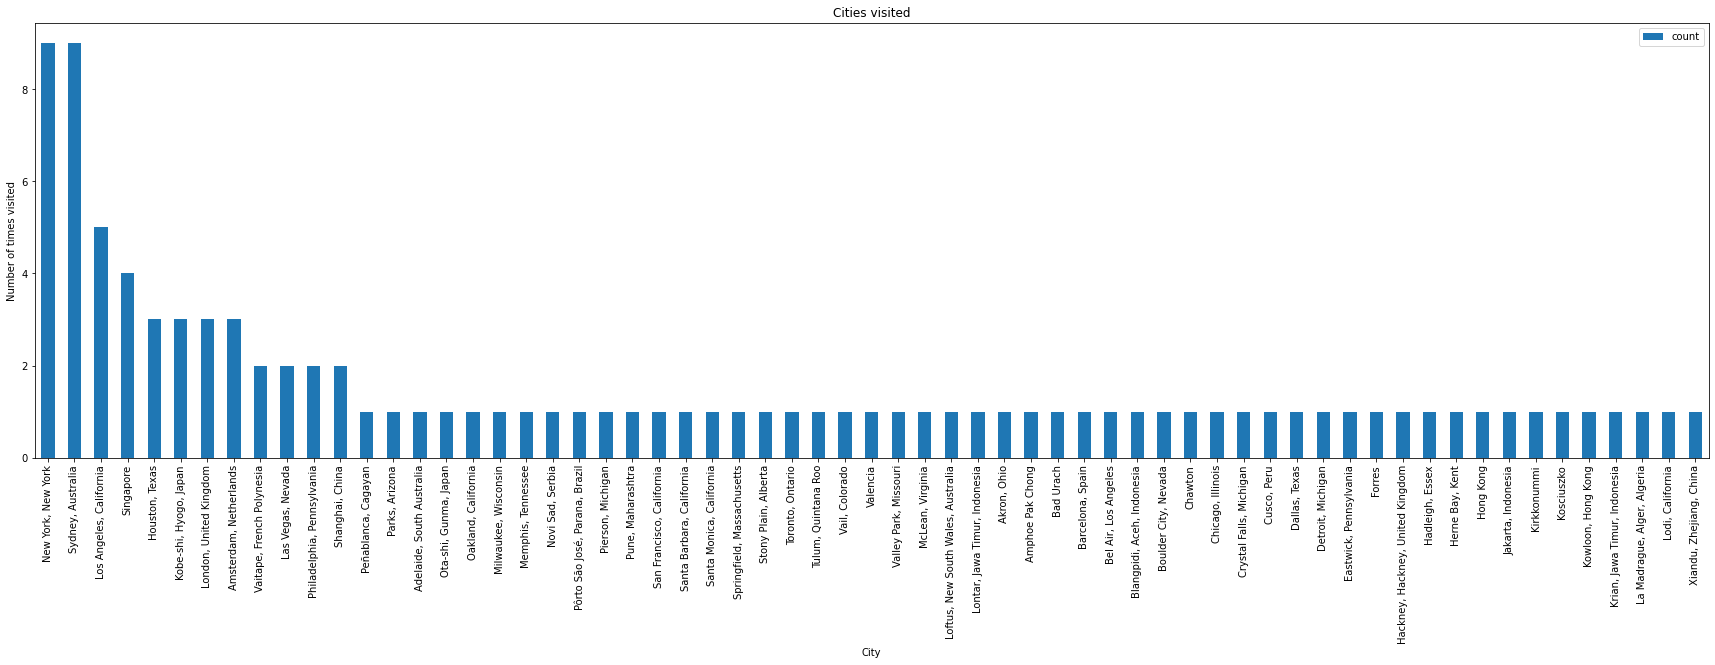

In [ ]:
#Count on City

locations_city_count =location_post_area \
    .groupby(['city'], dropna=True) \
    .agg(count=('post_id', 'count'))

locations_city_count.reset_index(inplace=True)

#Order from highest to lowest with respect to visits
locations_city_count.sort_values(by='count', ascending=False, inplace=True)

#Plot each time city has been visit 
locations_city_count.plot(x='city', y='count', kind='bar', 
           title='Cities visited', figsize=(30, 8),
           xlabel='City', ylabel='Number of times visited')


#### 5.4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

##### A "groupby" was used per post_type and a counter of the post_id was used to calculate the total number of post types. Then, a pd.plot.pie was used and through the "autopct" attribute the option to show the percentage was enabled. From the final result, it can be concluded that 90.8% of the posts made by the 10 most influential people contain only pictures and 9.2% contain only videos. There is no post that contains both post types together. Therefore, it can be inferred that the world population prefers to use platforms like Instagram to post mostly photos and leave other apps to watch videos.



<AxesSubplot:title={'center':'Post Types'}, ylabel='count'>

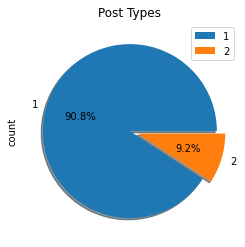

In [ ]:
#Pictures Only - Post type = 1
#Videos Only - Post type = 2
#Both - Post type =3
post_type_count =posts_top10_df \
    .groupby(['post_type']) \
    .agg(count=('post_id', 'count'))

post_type_count.plot.pie(y='count', title='Post Types', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

### 5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

##### To answer the first question, a "group by" per type of post is used and then the number of likes and comments obtained by each type of post is added.

##### It can be concluded that posts that only contain pictures have a higher number of acceptance and interactions with followers. Post type 1 has 69M likes vs. Post type 2 has 3M likes, obtaining a ratio of 95.8% against 4.2%. 
##### Regarding the comments, Post type 1 has approximately 500k comments vs. Post type 2 that has 26k, obtaining a ratio of 95.6% vs 4.4%. Thus maintaining the ratio obtained in the previous analysis.


In [ ]:
#Number of likes and comments per post_type
post_type_landc =posts_top10_df \
    .groupby(['post_type']) \
    .agg(sum_likes=('numbr_likes', 'sum'), sum_comments=('number_comments', 'sum'))

post_type_landc


,sum_likes,sum_comments
post_type,,
1,69285634.0,497013.0
2,3464814.0,26258.0


##### A pd.merge() was used to fetch the number of followers using the profile_id key.

In [ ]:
#Join posts and profile
followers_likes_posts = pd.merge(left=posts_top10_df, right=top10, left_on='profile_id', right_on='profile_id')


##### A .groupby() was used for profile_name and post_type along with the calculation of the average number of likes and comments and the number of followers per profile. Finally, the final DataFrame is ordered by the number of followers in descending order.

##### The final result shows what was previously analyzed. The number of likes is much higher than the number of comments on all the 10 most popular profiles.

##### It is also evident that, with the exception of the "Instragram" profile, there is no direct relationship between the number of likes and comments along with the number of followers. For example, "andresiniesta8" has fewer followers compared to the profile "victoriassecret" and still has on average a higher number of likes on their comments and videos.

In [ ]:
#Average number of likes and comments per post_type per top 10 user
post_type_landc =followers_likes_posts \
    .groupby(['profile_name','post_type']) \
    .agg(mean_likes=('numbr_likes', 'mean'), mean_comments=('number_comments', 'mean'), followers=('followers','mean'))

post_type_landc.reset_index(inplace=True)

post_type_landc  = post_type_landc  \
    .astype({'mean_likes' : 'int64','mean_comments' : 'int64','followers': 'int64'})

post_type_landc.sort_values(by='followers', ascending= False)

,profile_name,post_type,mean_likes,mean_comments,followers
5,instagram,1,905933,6703,285457645
6,instagram,2,593409,5749,285457645
12,victoriassecret,1,230749,438,65269440
13,victoriassecret,2,261408,583,65269440
8,nba,1,242235,1087,35339708
9,nba,2,207295,1026,35339708
7,louisvuitton,1,186857,867,30689316
2,buzzfeedtasty,1,100862,963,30246783
1,andresiniesta8,1,473022,2237,29542143
4,hm,1,81213,365,29176804


## RQ6

#### It's time to get information from the user posting effectiveness.

#### 6.1 What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

##### Through the for loop and the established chunksize, we select only the columns of interest: profile_id and cts

In [ ]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['profile_id','cts']]
    
    df_list.append(filtered)

86it [03:12,  2.24s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_dt_by_profile_id"

In [ ]:
from functools import reduce

post_dt_by_profile_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_dt_by_profile_id.head(5)

,profile_id,cts
0,2.237948e+09,2017-08-06 20:06:57.000
1,5.579335e+09,2017-06-19 09:31:16.000
2,3.134296e+08,2017-03-11 20:05:03.000
3,1.837593e+09,2016-09-13 16:27:16.000
4,1.131527e+09,2015-10-18 10:19:27.000


##### A backup CSV file is saved

In [ ]:
post_dt_by_profile_id.to_csv('post_dt_by_profile_id.csv')

post_dt_by_profile_id = pd.read_csv('post_dt_by_profile_id.csv', header=0, index_col=0)

##### A window operation was performed to obtain the time delta that a user had between one operation and another.

##### A count was made to find out how many posts had been made per user and the DataFrame was restricted to analyze the average time between posts only for users who had made more than one post.

In [ ]:
post_dt_by_profile_id.cts = pd.to_datetime(post_dt_by_profile_id.cts)

#Window operation 
post_dt_by_profile_id["_previous_time"] = ( 
    post_dt_by_profile_id.sort_values("cts").groupby("profile_id")["cts"].shift(1)
    )

post_dt_by_profile_id["_count_cts"] = post_dt_by_profile_id.groupby("profile_id")["cts"].transform("count")

post_dt_by_profile_id = post_dt_by_profile_id[post_dt_by_profile_id["_count_cts"] > 1].reset_index()

post_dt_by_profile_id["delta_time"] = post_dt_by_profile_id["cts"] - post_dt_by_profile_id["_previous_time"]

##### The columns of interest are saved in the DataFrame, the NaT values ​​are eliminated and we convert the DataFrame to Int64

In [ ]:
post_dt_by_profile_id = post_dt_by_profile_id[['profile_id','delta_time']]

post_dt_by_profile_id = post_dt_by_profile_id[post_dt_by_profile_id["delta_time"].notna()]

post_dt_by_profile_id = post_dt_by_profile_id.astype('int64')

##### The average time that passes between posts was calculated using .mean() after a groupby per profile_id

In [ ]:
post_dt_by_profile_id_mean = post_dt_by_profile_id \
    .groupby("profile_id")['delta_time'].mean().reset_index(name="mean")

##### The 3 people with the shortest average time were selected.

In [ ]:
post_dt_by_profile_id_mean = post_dt_by_profile_id_mean.nsmallest(3,'mean')

#Use to have the mean time in Days.
post_dt_by_profile_id_mean = post_dt_by_profile_id_mean.astype({'profile_id':'int64', 'mean': 'timedelta64[ns]'})

post_dt_by_profile_id_mean

,profile_id,mean
125819,8801686,0.0
160364,11534437,0.0
256203,19420666,0.0


##### To verify why there are 3 users with an average of 0, a filter was made of all the posts that these users made.

In [ ]:
top_3_smallest_mean = post_dt_by_profile_id_mean.profile_id.astype('int32').to_list()

from tqdm import tqdm

posts_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[chunk.profile_id.isin(top_3_smallest_mean)]
    
    posts_list.append(filtered)

86it [04:04,  2.84s/it]


##### As you can see, these 3 people made 2 different posts (they have different post IDs) at the same time. Therefore, they are the top 3 people with the lowest average between posts.

In [ ]:
from functools import reduce

top_3_smallest_mean_posts = reduce(lambda df1, df2: df1.append(df2), posts_list)



In [ ]:
top_3_smallest_mean_posts

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
8777270,37101699,156474,BnfClvhHN1WDJjKC_arIKYTniDzomnufr0qJRM0,8801686.0,2.049153e+14,2018-09-09 02:19:42.000,1,Saltountastic,46.0,3.0
31198194,15778261,156474,BnfClvhHN1W,8801686.0,2.049153e+14,2018-09-09 02:19:42.000,1,Saltountastic,46.0,3.0
39888507,25490420,-1,BvM-wR9lSUB,19420666.0,8.559840e+06,2019-03-19 21:11:01.000,1,She has the best big brother 💗,21.0,0.0
39888508,25490422,-1,BvM-wRnllHV,19420666.0,8.559840e+06,2019-03-19 21:11:01.000,1,“Angels are often disguised as daughters” - un...,21.0,0.0
42142328,27785492,-1,Msn7GmxVvS,11534437.0,2.176185e+07,2012-07-05 13:19:11.000,1,NaN,0.0,0.0
42142453,27785493,-1,Msn6-9xVvR,11534437.0,2.176185e+07,2012-07-05 13:19:11.000,1,NaN,0.0,0.0


##### The Data Frame Profiles was brought to obtain the number of followers and following.

In [ ]:
profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

profiles_df = profiles_df[profiles_df["profile_id"].notna()]

profiles_df = profiles_df.astype({'profile_id':'int64'})

In [ ]:
post_dt_by_profile_id_mean

,profile_id,mean
125819,8801686,0.0
160364,11534437,0.0
256203,19420666,0.0


##### A pd.merge() was used to fetch the number of followers using the profile_id key.

In [ ]:
#Join posts and profile
followers_following_top3 = pd.merge(left=post_dt_by_profile_id_mean, right=profiles_df, left_on='profile_id', right_on='profile_id')

##### As stated above, there are inconsistencies between the databases, so it only matched a profile ID belonging to Alex Dinsdale with 705 followers and 1572 following.

##### The number of n_posts is also ignored due to inconsistencies found between databases.

In [ ]:
followers_following_top3 = followers_following_top3[['profile_id','mean','followers','following']]
followers_following_top3

,profile_id,mean,followers,following
0,8801686,0.0,705.0,1572.0


##### According to experts, it is recommended to make 3 posts a week to have an active profile on Instagram: https://www.iprofesional.com/actualidad/330966-instagram-revela-su-secreto-cuantas-veces-debes-postear-al-dia

##### A year has 52.14 weeks. Doing the multiplication, this is equivalent to 156 publications per year. Taking into account that Instagram was created in 2010 and the base was extracted in 2019, by multiplying 156 by 9, we have 1,404 posts. Therefore, a better analysis would have been to look at the average number of posts from users who have at least 1,404 posts in these 9 years. It should be noted that the results would not have been entirely correct because the databases present inconsistencies.

#### 6.2 Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

##### Through the for loop and the established chunksize, we select only the columns of interest: profile_id and cts

In [ ]:
import pandas as pd
from tqdm import tqdm

likesandcomments_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.zip', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['numbr_likes','number_comments','cts']]
    
    likesandcomments_list.append(filtered)

86it [12:01,  8.38s/it] 


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_dt_by_profile_id"

In [ ]:
from functools import reduce

likesandcomments_df = reduce(lambda df1, df2: df1.append(df2), likesandcomments_list)

likesandcomments_df.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1230/1804233208.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  likesandcomments_df = reduce(lambda df1, df2: df1.append(df2), likesandcomments_list)


,numbr_likes,number_comments,cts
0,80.0,0.0,2017-08-06 20:06:57.000
1,25.0,1.0,2017-06-19 09:31:16.000
2,9.0,0.0,2017-03-11 20:05:03.000
3,4.0,0.0,2016-09-13 16:27:16.000
4,8.0,0.0,2015-10-18 10:19:27.000


##### A backup CSV file is saved

In [ ]:
#Save a copy of the DF of interest

likesandcomments_df.to_csv('likesandcomments_df.csv')

likesandcomments_df = pd.read_csv('likesandcomments_df.csv', header=0, index_col=0)

#### The function from point 3 was used to convert the "cts" column to a datetime

In [ ]:
#Function used in RQ3
def posts_cts_manager(post_dataframe):
    post_dataframe['cts'] = pd.to_datetime(post_dataframe.cts).dt.time
    return post_dataframe#

likesandcomments_df = posts_cts_manager(likesandcomments_df)
likesandcomments_df.dtypes

numbr_likes        float64
number_comments    float64
cts                 object
dtype: object

##### All null values ​​that are in the cts column are removed.

In [ ]:
likesandcomments_df.dropna(inplace = True, subset = ['cts'])

##### Two DataFrame are created, one for the number of likes and another for the number of comments, both related to cts.

In [ ]:
#DataFrime for the Number of Likes
likes_df = likesandcomments_df[['numbr_likes','cts']]

#DataFrime for the Number of Comments
comments_df = likesandcomments_df[['number_comments','cts']]

##### .hour was used to extract only the hour from the cts column and save it to a new one (_hour)

In [ ]:
likes_df['_hour'] = likes_df.cts.apply(lambda i: i.hour).astype(int)
likes_df

,numbr_likes,cts,_hour
0,80.0,20:06:57,20
1,25.0,09:31:16,9
2,9.0,20:05:03,20
3,4.0,16:27:16,16
4,8.0,10:19:27,10
...,...,...,...
42710192,74.0,15:38:04,15
42710193,49.0,11:28:01,11
42710194,18.0,20:16:37,20
42710195,27.0,20:07:52,20


##### We define the predefined intervals in point 3 in the "intervals" list.

##### Some changes were made to the function that was made in RQ3 since it works perfectly to count the number of posts but to perform operations it is not efficient.

In [ ]:
intervals = [0, 3, 6, 11, 14, 17, 20, 24]

##### Used pd.cut() function to segment and sort data values ​​into bins (time intervals)

##### The execution time is lower, so it's evident that it's more efficient to use pandas for databases than loops.

In [ ]:
likes_df['_bin'] = pd.cut(likes_df['_hour'], intervals, include_lowest=True, right=False)

likes_df

,numbr_likes,cts,_hour,_bin
0,80.0,20:06:57,20,"[20, 24)"
1,25.0,09:31:16,9,"[6, 11)"
2,9.0,20:05:03,20,"[20, 24)"
3,4.0,16:27:16,16,"[14, 17)"
4,8.0,10:19:27,10,"[6, 11)"
...,...,...,...,...
42710192,74.0,15:38:04,15,"[14, 17)"
42710193,49.0,11:28:01,11,"[11, 14)"
42710194,18.0,20:16:37,20,"[20, 24)"
42710195,27.0,20:07:52,20,"[20, 24)"


##### We perform a group by by _bin and add the number of likes to find out which is the interval with the highest number of likes.

In [ ]:
result_group_by_likes = likes_df \
    .groupby(['_bin'])[['numbr_likes']] \
    .sum() \
    .reset_index()

result_group_by_likes = result_group_by_likes \
    .astype({'numbr_likes' : 'int64'})

result_group_by_likes

,_bin,numbr_likes
0,"[0, 3)",1132228305
1,"[3, 6)",906307766
2,"[6, 11)",1714755026
3,"[11, 14)",1655934971
4,"[14, 17)",2008428995
5,"[17, 20)",2228425199
6,"[20, 24)",2461097190


##### Each interval has 4 hours, therefore the total sum obtained previously is divided into 4 to obtain the average

In [ ]:
#Average of Likes
result_group_by_likes['average_of_likes_per_interval']=result_group_by_likes['numbr_likes']/4

result_group_by_likes = result_group_by_likes \
    .astype({'average_of_likes_per_interval' : 'int64'})

result_group_by_likes

,_bin,numbr_likes,average_of_likes_per_interval
0,"[0, 3)",1132228305,283057076
1,"[3, 6)",906307766,226576941
2,"[6, 11)",1714755026,428688756
3,"[11, 14)",1655934971,413983742
4,"[14, 17)",2008428995,502107248
5,"[17, 20)",2228425199,557106299
6,"[20, 24)",2461097190,615274297


##### The DataFrame was transformed to Numpy to be able to plot it.

In [ ]:
result_group_by_likes_values = result_group_by_likes[['_bin','average_of_likes_per_interval']].astype(str)
 
result_group_by_likes_values_array = result_group_by_likes_values.to_numpy().tolist()

In [ ]:
result_group_by_likes_values_array

[['[0, 3)', '283057076'],
 ['[3, 6)', '226576941'],
 ['[6, 11)', '428688756'],
 ['[11, 14)', '413983742'],
 ['[14, 17)', '502107248'],
 ['[17, 20)', '557106299'],
 ['[20, 24)', '615274297']]

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

##### The function carried out in point 3 was slightly modified in order to continue using dictionaries and their attributes in the creation of the histogram.

In [ ]:
#Function used in RQ3
def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0

    for _bin, value in posts:
        if _bin == '[0, 3)':
            counter['00:00:00 02:59:59'] = value
        elif _bin == '[3, 6)':
            counter['03:00:00 05:59:59'] = value 
        elif _bin == '[6, 11)':
            counter['06:00:00 10:59:59'] = value 
        elif _bin == '[11, 14)':
            counter['11:00:00 13:59:59'] = value 
        elif _bin == '[14, 17)':
            counter['14:00:00 16:59:59'] = value 
        elif _bin == '[17, 20)':
            counter['17:00:00 19:59:59'] = value 
        elif _bin == '[20, 24)':
            counter['20:00:00 23:59:59'] = value 
    for key in counter:
        counter[key] = int(counter[key])
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the avergae quantity of number of likes for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1

##### In the histogram we can see that the interval that has the highest number of likes is interval 4 from 8:00 p.m. to 12:00 a.m with an average of 615M likes per hour

Digit 1 to insert custom input, other char will execute code with default


Histogram with the avergae quantity of number of likes for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


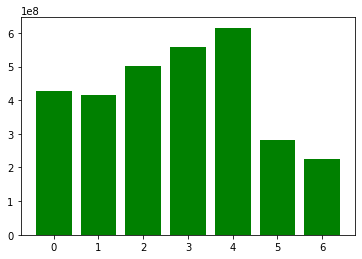

In [ ]:
posts = result_group_by_likes_values_array

#Function used in RQ3
print("Digit 1 to insert custom input, other char will execute code with default")
if(input() ==  str(1)):
    print("\n")
    input_t = [] 
    print("Write number of intervals:")
    n = int(input())
    print("Insert "+str(n)+" time intervals: (example: 06:00:00 10:59:59)")
    for i in range(n):
        print("Interval #",i)
        input_t.append(list(input().split()))
else:
    print("\n")
    input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.show()

##### The same process is repeated but with number of comments:

In [ ]:
comments_df['_hour'] = comments_df.cts.apply(lambda i: i.hour).astype(int)
comments_df

,number_comments,cts,_hour
0,0.0,20:06:57,20
1,1.0,09:31:16,9
2,0.0,20:05:03,20
3,0.0,16:27:16,16
4,0.0,10:19:27,10
...,...,...,...
42710192,0.0,15:38:04,15
42710193,0.0,11:28:01,11
42710194,0.0,20:16:37,20
42710195,1.0,20:07:52,20


In [ ]:
comments_df['_bin'] = pd.cut(comments_df['_hour'], intervals, include_lowest=True, right=False)
comments_df

,number_comments,cts,_hour,_bin
0,0.0,20:06:57,20,"[20, 24)"
1,1.0,09:31:16,9,"[6, 11)"
2,0.0,20:05:03,20,"[20, 24)"
3,0.0,16:27:16,16,"[14, 17)"
4,0.0,10:19:27,10,"[6, 11)"
...,...,...,...,...
42710192,0.0,15:38:04,15,"[14, 17)"
42710193,0.0,11:28:01,11,"[11, 14)"
42710194,0.0,20:16:37,20,"[20, 24)"
42710195,1.0,20:07:52,20,"[20, 24)"


In [ ]:
result_group_by_comments = comments_df \
    .groupby(['_bin'])[['number_comments']] \
    .sum() \
    .reset_index()

result_group_by_comments = result_group_by_comments \
    .astype({'number_comments' : 'int64'})

result_group_by_comments

,_bin,number_comments
0,"[0, 3)",32027925
1,"[3, 6)",23870239
2,"[6, 11)",46784338
3,"[11, 14)",43755376
4,"[14, 17)",52081094
5,"[17, 20)",59538096
6,"[20, 24)",66302700


In [ ]:
#Average of comments
result_group_by_comments['average_of_comments_per_hour']=result_group_by_comments['number_comments']/4

result_group_by_comments = result_group_by_comments \
    .astype({'average_of_comments_per_hour' : 'int64'})

In [ ]:
result_group_by_comments_values = result_group_by_comments[['_bin','average_of_comments_per_hour']].astype(str)
 
result_group_by_comments_values_array = result_group_by_comments_values.to_numpy().tolist()

result_group_by_comments_values_array

[['[0, 3)', '8006981'],
 ['[3, 6)', '5967559'],
 ['[6, 11)', '11696084'],
 ['[11, 14)', '10938844'],
 ['[14, 17)', '13020273'],
 ['[17, 20)', '14884524'],
 ['[20, 24)', '16575675']]

In [ ]:
#Function used in RQ3
def time_interval(time_list,posts):
    counter  = defaultdict()
    for time in time_list:
        interval = time[0].strftime("%H:%M:%S")+" "+time[1].strftime("%H:%M:%S")
        counter[interval] = 0

    for _bin, value in posts:
        if _bin == '[0, 3)':
            counter['00:00:00 02:59:59'] = value
        elif _bin == '[3, 6)':
            counter['03:00:00 05:59:59'] = value 
        elif _bin == '[6, 11)':
            counter['06:00:00 10:59:59'] = value 
        elif _bin == '[11, 14)':
            counter['11:00:00 13:59:59'] = value 
        elif _bin == '[14, 17)':
            counter['14:00:00 16:59:59'] = value 
        elif _bin == '[17, 20)':
            counter['17:00:00 19:59:59'] = value 
        elif _bin == '[20, 24)':
            counter['20:00:00 23:59:59'] = value 
    for key in counter:
        counter[key] = int(counter[key])
    hist  = plt.bar(range(len(list(counter.keys()))), counter.values(), color='g')
    print("Histogram with the avergae quantity of number of likes for each interval given as input:")
    i= 0
    for key in counter.keys():
        print( "Interval "+str(i)+" = "+key)
        i+=1

##### As can be seen in the histogram, interval 4 is the one that obtains the highest number of comments as well as the highest number of likes.

Digit 1 to insert custom input, other char will execute code with default


Histogram with the avergae quantity of number of likes for each interval given as input:
Interval 0 = 06:00:00 10:59:59
Interval 1 = 11:00:00 13:59:59
Interval 2 = 14:00:00 16:59:59
Interval 3 = 17:00:00 19:59:59
Interval 4 = 20:00:00 23:59:59
Interval 5 = 00:00:00 02:59:59
Interval 6 = 03:00:00 05:59:59


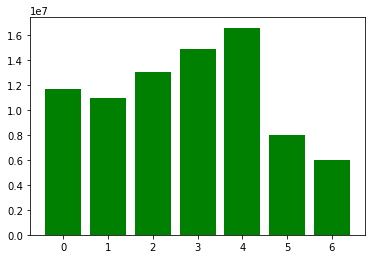

In [ ]:
posts = result_group_by_comments_values_array

#Function used in RQ3
input_t = [['06:00:00','10:59:59'],['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00', '19:59:59'],['20:00:00','23:59:59'],['00:00:00','02:59:59'],['03:00:00','05:59:59']]
time_list = []
for interval in input_t:
    row  = []
    row.append(datetime.strptime(interval[0], '%H:%M:%S').time())
    row.append(datetime.strptime(interval[1],'%H:%M:%S').time())
    time_list.append(row)
time_interval(time_list,posts)
plt.show()

# Command Line Question 

Using the command line is a feature that Data Scientists must master. It is relevant since the operations there require less memory to use in comparison to other interfaces. It also does not use as much CPU processing time as other interfaces. In addition, it can be faster and more efficient and handle repetitive tasks quickly. 

In this question, you should use command line tools such as grep and possibly other commands to answer the following question: 
- Using the instagram_posts.csv, retrieve the first __ten posts__ with descriptions __longer than 100 characters__ and output the <ins>profiles that posted them</ins>. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output __User was not found!__ for those posts.)

__Note:__ You may work on this question <ins>in any environment</ins> (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in __CommandLine.sh__, which must be executable.


**I did the command line question in my Ec2 instance to work properly on all the file instagrmam_posts.csv**


**I used the following lines in the linux terminal to obatain the result asked in the question**


**The file containing the all profile_id corresponding to the profiles that published a post with a description longer than 100 characters is saved in a new .csv file (profile.csv) than i take the first ten rows of that file to obtain the final result which is printed on the terminal**

**Content of commandLine.sh**


1 awk 'length($8)>100{print($4)}' instagram_posts.csv > profile.csv


2 cat profile.csv | head -10


# Algorithmic Question
1. [**AQ1**] Given the following pseudocode, answer the questions: 

<pre>
Input: 
    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end): 
    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 
    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
f2(List, 0, N)
</pre>
- What is the output of this algorithm? Describe the mechanism of the algorithm <ins>in detail </ins>. We __do not__ want to know only its final result. (Describe one example on your own)
- What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N? 
- Is this algorithm the __optimal__ one to produce this output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?


**Pyhton implementation of the algorithm**

In [ ]:
def f1(sequence,end):
    for i in range(end):
        print(sequence[i])
    print('\n')
def f2(sequence,start,end):
    if start == end :
        f1(sequence,end)
    else: 
        for i in range(start,end):
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence,start+1,end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            

**Example of execution**

In [ ]:
sequence = ['a','b','c']
N= 3

In [ ]:
f2(sequence,0,N)

a
b
c


a
c
b


b
a
c


b
c
a


c
b
a


c
a
b




**AQ1.1**

***The algorithm implements 1 recursive function f2 and 1 function f1 to print all the possible combination of a list of N characters.
At first the call f2(sequence,0,N) enters in the else block,because start(=0)!=end(=N), and inside the for loop, the for is blocked, beacuse f2(sequence,0+1,N) is called, and waits for the execution of this recursive call. f2(sequence,0+1,N) starts a recursive chain. 
This is create a n-ary tree of recursive calls, its leaves are the call to f1(sequence,N) function which
prints the sequence given as input.
The sequence is modified in the execution of this algorithm beacuse f2 does side-effect.***


**AQ1.2**


***To compute with the big-O notation the asymptotic i counted the number of recursive call made by  f2(sequece,0,N)***


$$
\begin{equation}
T(N) = N*T(N-1) + const
\end{equation}
$$
$$
\begin{equation}
T(0) = const
\end{equation}
$$
$$
\begin{equation}
T(N-1) = (N-1)*T(N-2) + const
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*T(N-2) + const*(N+1)
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*(N-2)*T(N-3) + N*(N-1)*const + (N+1)*const
\end{equation}
$$
$$
\begin{equation}
T(N) = N*(N-1)*(N-2)*....*2*1*T(0) + const*[1+N+N*(N-1)+N*(N-1)*(N-2)+...+N*(N-1)*(N-2)*...*4*3]
\end{equation}
$$
$$
\begin{equation}
T(N) = N! + (\sum_{k = 0}^{N-2} \frac {N!}{(N-K)!})
\end{equation}
$$

**T(N) IS O(N!)**

**AQ1.3**

***This algorithm is O(N!) which is optimal for the problem of printing all the possible combination of a list of N characters. This result match with the number of all the possible combinations of N elements which is N!.***

### [AQ2] Considering the following problem, answer the questions:

##### Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

##### Each piece of the cut should have an integer length
##### He should at least cut the ribbon once
##### The multiplication of the length of all the pieces be the maximum possible

#### 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

##### ribbon_pieces is the recursive function that is going to be in charge of using max() to solve condition 3 of the problem statement.

##### max() funcion returns the item with the highest value of the multiplication of the parts.

##### The ribbon cannot be of negative length and cannot be less than 1 to meet conditions 1 and 2. This is why the first base case was made.

##### A for loop is set to iterate piece in the range of N (ribbon len). The range of the iteration is going to be from 1 to N-1 to be able to apply recursion without reaching N = 1. When N = 2, the only solution is to cut the ribbon into 2 parts (1 and 1) so it returns 1 and would be the second base case.

##### The ribbon begins to be cut in "piece" and the remainder of the ribbon is "N - piece". Recursion is performed in this second part of the ribbon to choose the maximum value that results from the multiplication of the cuts by doing comparisons. This result is saved in the variable "recursive_path". As the for loop progresses, the variable "ans_max" will choose between which multiplication is greater, if the one that is being done now or the one that was done in the previous iteration.


In [ ]:
def ribbon_pieces(N):

    ans_max = 1

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #range from 1 to N: to be able to apply recursion without reaching N = 1.
    for piece in range(1, N-1):

        recursive_path = max(piece * (N-piece), piece * ribbon_pieces(N-piece))
        
        ans_max = max(ans_max, recursive_path)
    

    return ans_max

N= int(input().strip())

ribbon_pieces(N)

36

#### 2. Show that the algorithm has exponential running time.

##### To show that the time complexity of the algorithm is exponential, a recursion tree was made:

<img src= 'ADMHW2AQ2.png'>

##### This is the recursion tree of ribbon_pieces when N=7. 

#### Therefore, the time complexity if the algorithm is equal to: (The number of times the function is repeated was counted following the recursion tree)

$$ T(1) = 0 $$
$$ T(2) = T(1) + 1 = 1 $$
$$ T(3) = T(2) + 1 = 2 $$
$$ T(4) = T(3) + T(2) + 1 = 4 $$
$$ T(5) = T(4) + T(3) + T(2) + 1 = 8 $$
$$ T(6) = T(5) + T(4) + T(3) + T(2) + 1 = 16 $$
$$ T(7) = T(6) + T(5) + T(4) + T(3) + T(2) + 1 = 32 $$


$$ T(n) = \sum_{i=2}^{n-1} T(i) + 1 $$

$$ T(n) = 2^{n-2}  \ n>=2 $$

##### Math induction:



$$ T(2) = 2^{2-2} = 1 $$
$$ T(n) = 2^{n-2} $$
$$ T(n+1) = 2^{n+1-2} $$
$$ T(n+1) = \sum_{i=2}^{n+1-1} T(i) + 1 $$
$$ T(n+1) = T(n) + \sum_{i=2}^{n-1} T(i) + 1 $$
$$ T(n+1) = T(n) + T(n) $$
$$ T(n+1) = 2T(n) = 2(2^{n-2}) = 2^{n-1}



##### The result is that the time complexity has an exponencial running time: 
$$ 2^{n-1}

#### 3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [ ]:
def ribbon_pieces_dynamic(N):

    #Base cases:
    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
    
    #list_ans will save all the results of the previous iterations
    list_ans = []

    for piece_len in range(0,N+1):
            
        a = 0
        list_ans.append(a)

    for piece_len in range(1,N+1):

        ans_max = 0
    
        for piece in range(1, piece_len):

             ans_max = max(ans_max, (list_ans[piece_len - piece]*piece))

             ans_max = max(ans_max, (piece_len - piece)*piece)

        list_ans[piece_len] = ans_max
    
    return list_ans[N]

N= int(input().strip())

ribbon_pieces_dynamic(N)

12

##### Since we are saving the values ​​of each traversal in the "list_ans" list, the time complexity would be as follows:

##### Without focusing on the for loop of the list, and only focusing on the double for, we get the execution time.

##### With N= 3, in the first for, the execution time would be:

$$ T(1) = 1 + 3(n+1) + 3n = 6n + 4 $$

##### The inner for execution time:

$$ T(2) = 1 + \frac{((n-1)*n)}{2} = \frac{(n^{2} - n + 2)}{2} $$

##### Total time execution:

$$ T(1) + T(2) = \frac{n^2 + 11n + 10}{2} $$

##### Therefore, the time complexity is:

$$ O(n^2)

#### 4. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [ ]:
import time

def f1(x):
    ## f1 is the recursion algorithm
    ans = ribbon_pieces(x)
    return ans

def f2(x):
    ## f2 is the dynamic solution
    ans = ribbon_pieces_dynamic(x)
    return ans

def timed(f):
    
    def wrapper(n):
        start_time = time.time()
        ret = f(n)
        elapsed_time = time.time() - start_time
        return elapsed_time, ret
    
    return wrapper

timed_f1 = timed(f1)

timed_f2 = timed(f2)

#timed_f2(10)


In [ ]:
import pandas as pd

result = pd.DataFrame([(*timed_f1(x), *timed_f2(x)) for x in range(2,26)], 
                        columns=["time_f1","result_f1","time_f2","result_f2"])

result.reset_index(inplace = True)

result

,index,time_f1,result_f1,time_f2,result_f2
0,0,0.000010,1,0.000002,1
1,1,0.000016,2,0.000004,2
2,2,0.000002,4,0.000005,4
3,3,0.000005,6,0.000007,6
4,4,0.000009,9,0.000009,9
5,5,0.000017,12,0.000011,12
6,6,0.000035,18,0.000015,18
7,7,0.000071,27,0.000018,27
8,8,0.000141,36,0.000022,36
9,9,0.000283,54,0.000025,54


<AxesSubplot:title={'center':'Execution time'}, xlabel='Ns', ylabel='Executon time'>

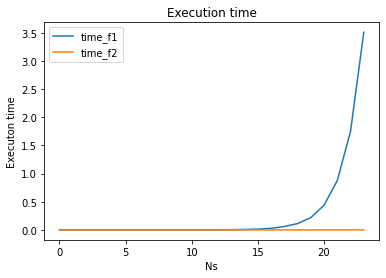

In [ ]:
result.plot.line(x='index', y=['time_f1','time_f2'], title='Execution time',
                    xlabel='Ns', ylabel='Executon time')

##### As evidenced in the line graph, when the execution time is exponential, as the number of iterations increases, the execution time increases exponentially. On the other hand, f_2, which was the polynomial solution, has a very small increase in execution time, so it will be more efficient. Likewise, as shown in the "result" DataFrame, the results of both implementations are the same, so it can be concluded that you should always try to get a solution that has a polynomial execution time, and not an exponential one so that the algorithm can be more efficient.

#### 5. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

##### As we could see in the previous implementations, when the ribbon is cut into pieces of 3, we are going to get the largest multiplication number.

##### For example: N = 15

$$ \frac{15}{3} = 5 $$

##### Therefore, we have to do:

$$ 3^{5} $$

##### to get the largest product.

##### The problem is when N is not divisible by 3. So the last part of the ribbon must be left at 2 or 4. Therefore, the operation "N = N-3" is performed to cut the ribbon in 3 and the piece (initialized in 1) is multiplied by 3.
##### As N is greater, and can be divided into 3, piece = piece * 3 will carry out the multiplication of the pieces of len 3 that are cut.

In [ ]:
def ribbon_pieces__(N):

    piece = 1

    if (N <= 1):
        return 0
    
    if (N == 2):
        return 1
     
    if (N == 3):
        return 2
  
    while (N > 4):
        
        N = N - 3
        
        piece = piece * 3
        
     
    return (N * piece)
 
N= int(input().strip())

ribbon_pieces__(N)
     

59049